In [30]:
from doa import doa_inference
from parameters import respeaker_array
import soundfile as sf
import librosa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=False)
plt.rcParams.update({'font.size': 20})
import os

Original size: 937.54 KB, FLAC size: 444.57 KB, Compression ratio: 2.11


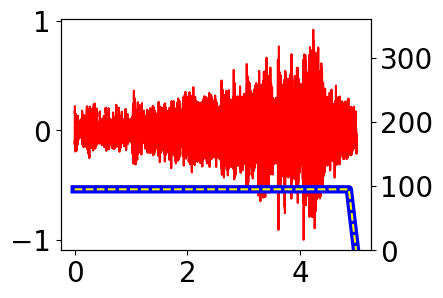

Original size: 937.54 KB, FLAC size: 397.32 KB, Compression ratio: 2.36


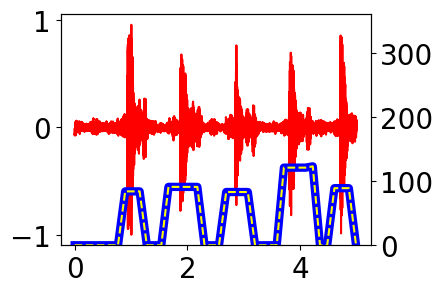

Original size: 937.54 KB, FLAC size: 481.12 KB, Compression ratio: 1.95


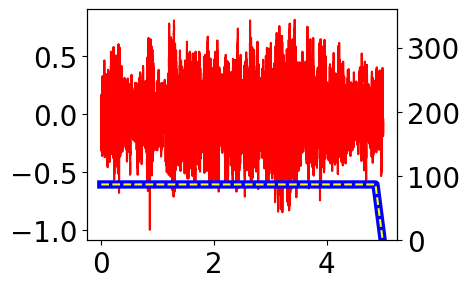

Original size: 937.54 KB, FLAC size: 437.87 KB, Compression ratio: 2.14


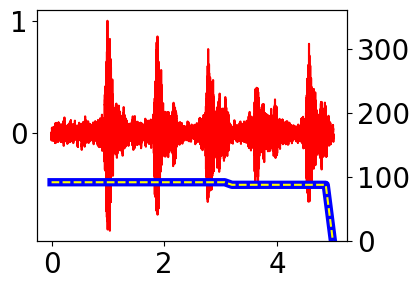

Original size: 937.54 KB, FLAC size: 480.86 KB, Compression ratio: 1.95


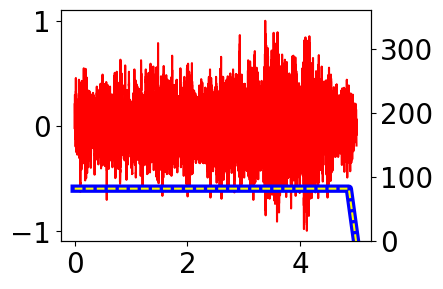

Original size: 937.54 KB, FLAC size: 436.47 KB, Compression ratio: 2.15


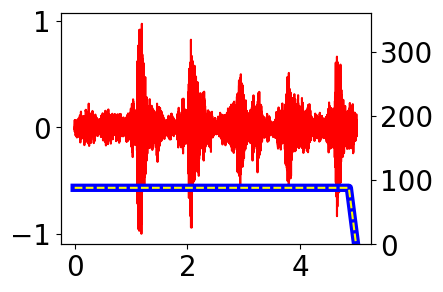

In [58]:
# present the direction estimation
dataset_dir = '../dataset/6_10_2025_measurement/'
audio_files = os.listdir(dataset_dir); audio_files.sort()
for audio_file in audio_files:
    audio_file = os.path.join(dataset_dir, audio_file)

    audio, fs = librosa.load(audio_file, sr=None, mono=False)
    audio = audio[1:5]
    audio = audio / np.max(np.abs(audio), axis=1, keepdims=True)
    mic_array = np.array(respeaker_array).T
    t_audio = np.arange(len(audio[0])) / fs

    predictions = doa_inference(audio, mic_array, fs, 2048, 'music', mode='active')
    t_predictions = np.arange(len(predictions)) * 2048 / fs
    sf.write('flac_tmp.flac', audio.T, fs)
    audio_flac, fs = librosa.load('flac_tmp.flac', sr=None, mono=False)

    # get the compression ratio
    original_size = os.path.getsize(audio_file); flac_size = os.path.getsize('flac_tmp.flac')
    compression_ratio = original_size / flac_size
    print(f'Original size: {original_size / 1024:.2f} KB, FLAC size: {flac_size / 1024:.2f} KB, Compression ratio: {compression_ratio:.2f}')

    os.remove('flac_tmp.flac')
    predictions_flac = doa_inference(audio_flac, mic_array, fs, 2048, 'music', mode='active')

    plt.figure(figsize=(4, 3))
    plt.plot(t_audio, audio[0], label='Audio Channel 1', color='red')
    # plot doa at another axis
    ax2 = plt.gca().twinx()
    plt.plot(t_predictions, predictions, label='DOA Prediction', color='blue', linewidth=6)
    plt.plot(t_predictions, predictions_flac, label='DOA Prediction (FLAC)', color='yellow', linestyle='--')
    plt.ylim(0, 360)
    plt.show()

In [ ]:
# show the SNR vs distance
dataset_dir = '../dataset/6_10_2025_measurement/'
audio_files = os.listdir(dataset_dir); audio_files.sort()
audio_files = audio_files[1::2]  # take every second file for SNR calculation
for audio_file in audio_files:
    audio_file = os.path.join(dataset_dir, audio_file)

    audio, fs = librosa.load(audio_file, sr=None, mono=False)
    audio = audio[1, :int(2 * fs)]  # take the first channel and first 2 seconds
    noise_segment = audio[:int(0.5 * fs)]
    signal_segment = audio[int(0.5 * fs):int(1.5 * fs)]
    noise_power = np.mean(noise_segment ** 2)
    signal_power = np.mean(signal_segment ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    plt.figure(figsize=(4, 3))
    plt.plot(audio, label='Audio Signal', color='red')
    plt.show()